#Seria-A Prediction


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
#drive.mount('/content/drive')

In [ ]:
#  file_path = '/content/drive/My Drive/I1.csv'
#  df = pd.read_csv(file_path)

In [ ]:
 file_path = '/content/I1.csv'
 df = pd.read_csv(file_path)

In [ ]:
# Checking for missing values
print(df.isnull().sum().max())

200


In [ ]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,19/08/2023,17:30,Empoli,Verona,0,1,A,0,0,...,1.85,-0.25,2.02,1.91,2.01,1.92,2.03,1.98,1.94,1.90
1,I1,19/08/2023,17:30,Frosinone,Napoli,1,3,A,1,2,...,2.10,1.00,1.96,1.97,1.97,1.95,2.02,1.98,1.95,1.89
2,I1,19/08/2023,19:45,Genoa,Fiorentina,1,4,A,0,3,...,1.74,0.25,1.79,2.15,1.82,2.13,2.02,2.15,1.86,2.00
3,I1,19/08/2023,19:45,Inter,Monza,2,0,H,1,0,...,2.38,-1.25,1.92,2.01,1.91,2.02,1.94,2.05,1.87,1.98
4,I1,20/08/2023,17:30,Roma,Salernitana,2,2,D,1,1,...,1.68,-1.00,1.95,1.98,1.94,1.98,2.03,2.03,1.92,1.93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 105 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(7)
memory usage: 311.8+ KB


In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])

BWH      10
BWD      10
BWA      10
IWH     200
IWD     200
IWA     200
BWCH      8
BWCD      8
BWCA      8
IWCH    200
IWCD    200
IWCA    200
dtype: int64


In [ ]:
    # Droping rows with missing target values
df.dropna(subset=['FTR'], inplace=True)

# Separating numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Filling missing values in numeric columns with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Filling missing values in non-numeric columns with mode
for col in df.columns:df[col].fillna(df[col].mode()[0], inplace=True)


# Checking if there are any missing values left
print(df.isnull().sum())

print(df.head())


Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 105, dtype: int64
  Div        Date   Time   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  I1  19/08/2023  17:30     Empoli       Verona     0     1   A     0     0   
1  I1  19/08/2023  17:30  Frosinone       Napoli     1     3   A     1     2   
2  I1  19/08/2023  19:45      Genoa   Fiorentina     1     4   A     0     3   
3  I1  19/08/2023  19:45      Inter        Monza     2     0   H     1     0   
4  I1  20/08/2023  17:30       Roma  Salernitana     2     2   D     1     1   

   ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  \
0  ...     1.85 -0.25      2.02      1.91   2.01   1.92     2.03     1.98   
1  ...     2.10  1.00      1.96      1.97   1.97   1.95     2.02     1.98   
2  ...     1.74  0.25      1.79      2.15   1.82   2.13     2.02     2.15   
3  ...     2.38 -1.25      1.92

In [ ]:
# Converting categorical variables to numerical
label_encoder = LabelEncoder()
df['HomeTeam'] = label_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam'] = label_encoder.fit_transform(df['AwayTeam'])
df['FTR'] = label_encoder.fit_transform(df['FTR'])
df['HTR'] = label_encoder.fit_transform(df['HTR'])

print(df.head())

  Div        Date   Time  HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0  I1  19/08/2023  17:30         3        19     0     1    0     0     0   
1  I1  19/08/2023  17:30         5        13     1     3    0     1     2   
2  I1  19/08/2023  19:45         6         4     1     4    0     0     3   
3  I1  19/08/2023  19:45         7        12     2     0    2     1     0   
4  I1  20/08/2023  17:30        14        15     2     2    1     1     1   

   ...  AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  \
0  ...      1.85 -0.25      2.02      1.91   2.01   1.92     2.03     1.98   
1  ...      2.10  1.00      1.96      1.97   1.97   1.95     2.02     1.98   
2  ...      1.74  0.25      1.79      2.15   1.82   2.13     2.02     2.15   
3  ...      2.38 -1.25      1.92      2.01   1.91   2.02     1.94     2.05   
4  ...      1.68 -1.00      1.95      1.98   1.94   1.98     2.03     2.03   

   AvgCAHH  AvgCAHA  
0     1.94     1.90  
1     1.95     1.89  
2 

<Axes: xlabel='FTR', ylabel='count'>

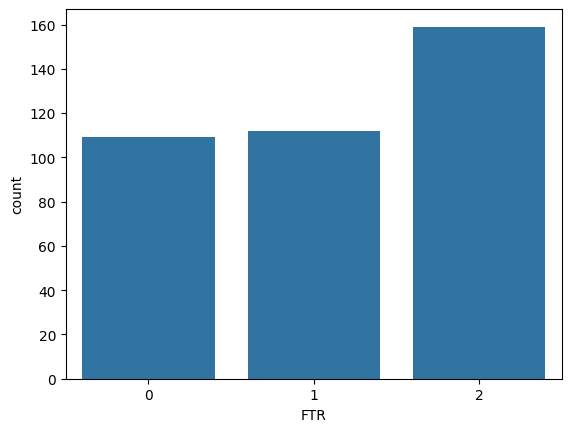

In [ ]:
sns.countplot(x='FTR',data=df)

In [ ]:
keywords_drop = ['B365', 'BW', 'IW', 'PS', 'WH', 'VC', 'Max', 'Avg', 'P>2.5', 'P<2.5', 'AHh', 'AHH', 'AHA', 'CH', 'CD', 'CA', 'C>2.5', 'C<2.5','AHCh','FTAG','FTHG']

# Creating a list of columns to drop
columns_to_drop = [col for col in df.columns if any(keyword in col for keyword in keywords_drop)]
df = df.drop(columns=columns_to_drop)
X = df.drop(['FTR','Div','Date','Time'],axis=1)
y = df['FTR']

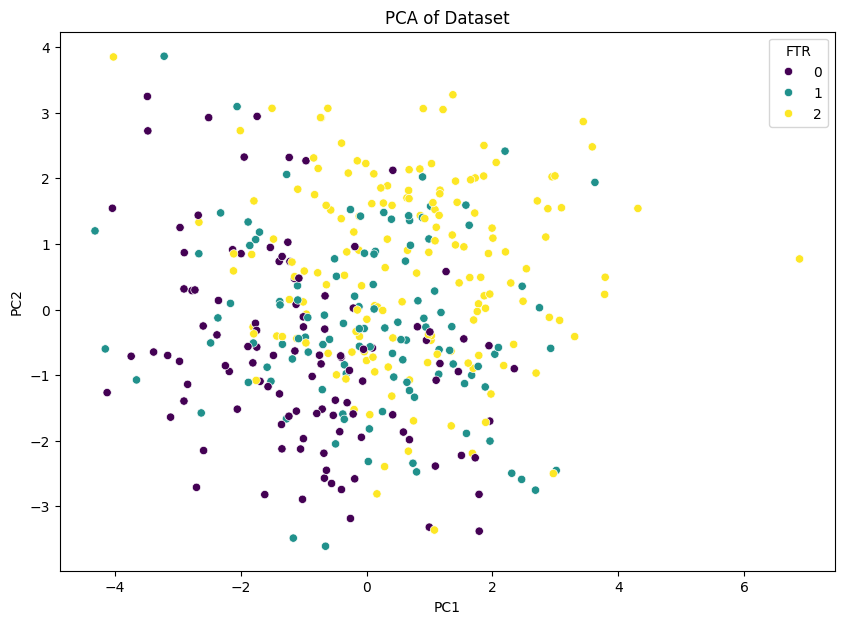

In [ ]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the target variable
pc_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

# Plotting the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='FTR', data=pc_df, palette='viridis')
plt.title('PCA of Dataset')
plt.show()


In [ ]:
# scale/normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)


In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6052631578947368
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.29      0.28      0.29        18
           2       0.71      0.74      0.72        34

    accuracy                           0.61        76
   macro avg       0.56      0.56      0.56        76
weighted avg       0.60      0.61      0.60        76

Confusion Matrix:
[[16  5  3]
 [ 6  5  7]
 [ 2  7 25]]


In [ ]:
importances = rf.feature_importances_

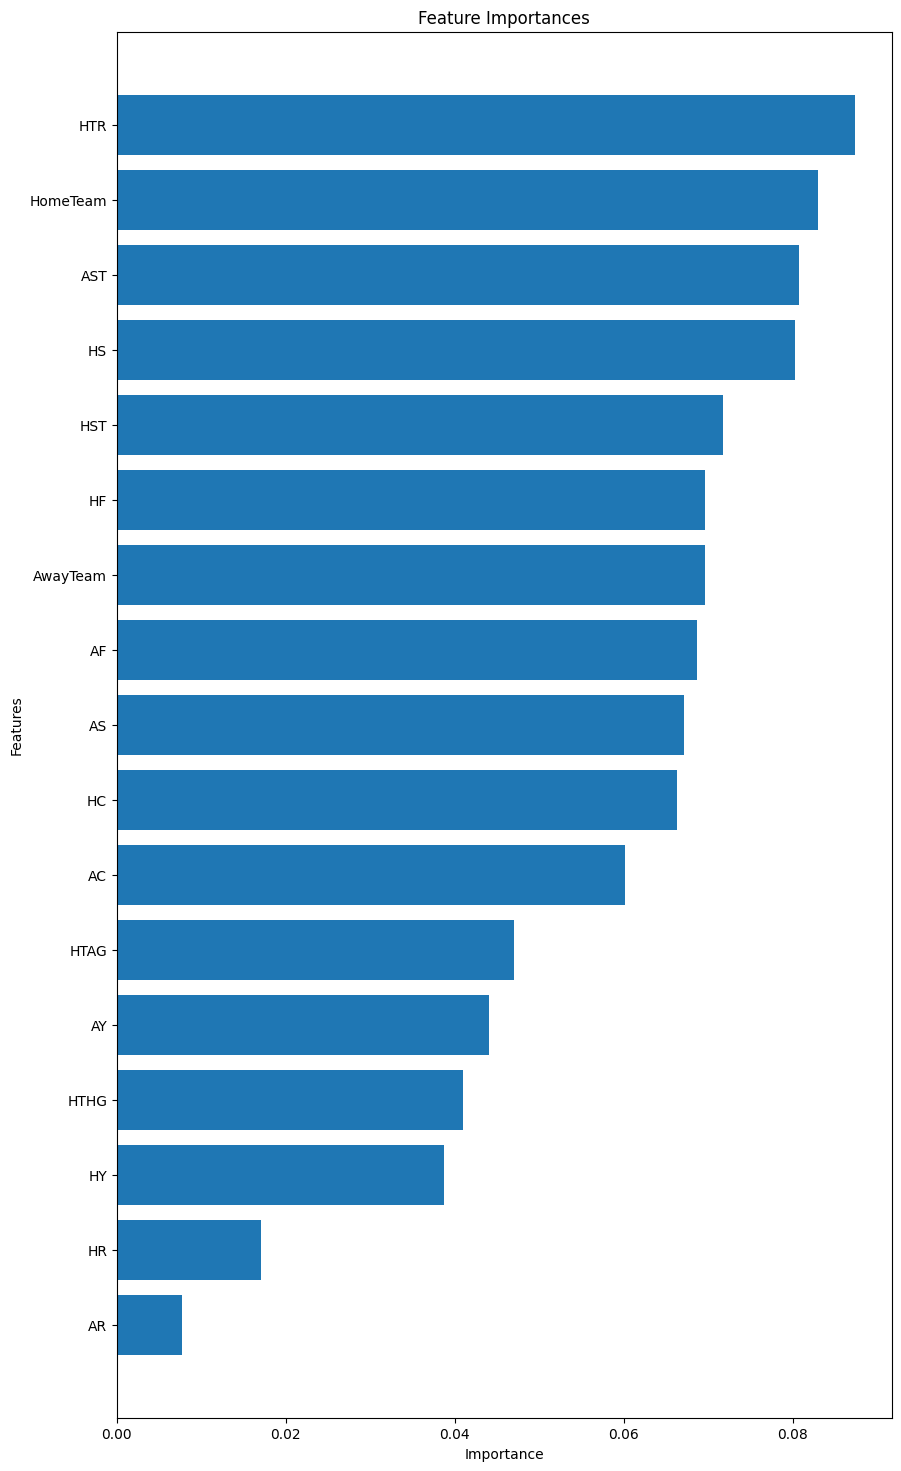

In [ ]:
importances = importances / np.sum(importances)
indices = np.argsort(importances)
plt.figure(figsize=(10, 18))  # Adjust the figure size as needed
plt.barh(range(len(X.columns)), importances[indices])
plt.yticks(range(len(X.columns)), [X.columns[i] for i in indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
threshold = 0.01
unimportant_features = X.columns[importances < threshold]


In [ ]:
X=X.drop(columns=unimportant_features)
X.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,3,19,0,0,1,10,10,4,4,17,18,2,4,2,2,0
1,5,13,1,2,0,4,19,1,8,14,17,4,6,3,3,0
2,6,4,0,3,0,4,9,2,5,14,13,3,4,2,3,0
3,7,12,1,0,2,22,12,3,2,8,13,8,3,1,1,0
4,14,15,1,1,1,13,3,3,2,12,9,9,1,0,4,0


In [ ]:
# scale/normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6052631578947368
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        24
           1       0.33      0.39      0.36        18
           2       0.72      0.68      0.70        34

    accuracy                           0.61        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.62      0.61      0.61        76

Confusion Matrix:
[[16  5  3]
 [ 5  7  6]
 [ 2  9 23]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,         # Use less data per tree
    max_features='sqrt',   # Limit the number of features to consider at each split
    random_state=42
)
# Valid parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(200, 500),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                                      n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV for Random Forest
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_

# Predict with the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the tuned Random Forest model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Random Forest Accuracy: 0.631578947368421
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.35      0.39      0.37        18
           2       0.76      0.76      0.76        34

    accuracy                           0.63        76
   macro avg       0.60      0.59      0.60        76
weighted avg       0.64      0.63      0.64        76

Confusion Matrix:
[[15  7  2]
 [ 5  7  6]
 [ 2  6 26]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model3 = LogisticRegression(random_state=42,max_iter=1000,C=0.1)

# Define the parameter grid
param_dist_lr = {
    'C': uniform(0.01, 1),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(estimator=model3, param_distributions=param_dist_lr,
                                      n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV for Logistic Regression
random_search_lr.fit(X_train, y_train)
best_lr = random_search_lr.best_estimator_

# Predict with the best Logistic Regression model
y_pred_lr = best_lr.predict(X_test)

# Evaluate the tuned Logistic Regression model
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Tuned Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Logistic Regression Accuracy: 0.5921052631578947
Tuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        24
           1       0.22      0.22      0.22        18
           2       0.75      0.71      0.73        34

    accuracy                           0.59        76
   macro avg       0.54      0.55      0.54        76
weighted avg       0.59      0.59      0.59        76

Confusion Matrix:
[[16  7  1]
 [ 5  6  7]
 [ 2  7 25]]


In [ ]:
file_path = '/content/I1.csv'
df_copy = pd.read_csv(file_path)

In [ ]:
df_copy["matchDate"] = pd.to_datetime( df_copy["Date"], dayfirst=True)

In [ ]:
df_copy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,matchDate
0,I1,19/08/2023,17:30,Empoli,Verona,0,1,A,0,0,...,-0.25,2.02,1.91,2.01,1.92,2.03,1.98,1.94,1.90,2023-08-19
1,I1,19/08/2023,17:30,Frosinone,Napoli,1,3,A,1,2,...,1.00,1.96,1.97,1.97,1.95,2.02,1.98,1.95,1.89,2023-08-19
2,I1,19/08/2023,19:45,Genoa,Fiorentina,1,4,A,0,3,...,0.25,1.79,2.15,1.82,2.13,2.02,2.15,1.86,2.00,2023-08-19
3,I1,19/08/2023,19:45,Inter,Monza,2,0,H,1,0,...,-1.25,1.92,2.01,1.91,2.02,1.94,2.05,1.87,1.98,2023-08-19
4,I1,20/08/2023,17:30,Roma,Salernitana,2,2,D,1,1,...,-1.00,1.95,1.98,1.94,1.98,2.03,2.03,1.92,1.93,2023-08-20


In [ ]:
df_copy['matchDay'] = df_copy['matchDate'].dt.day_name()

In [ ]:
df_copy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,matchDate,matchDay
0,I1,19/08/2023,17:30,Empoli,Verona,0,1,A,0,0,...,2.02,1.91,2.01,1.92,2.03,1.98,1.94,1.90,2023-08-19,Saturday
1,I1,19/08/2023,17:30,Frosinone,Napoli,1,3,A,1,2,...,1.96,1.97,1.97,1.95,2.02,1.98,1.95,1.89,2023-08-19,Saturday
2,I1,19/08/2023,19:45,Genoa,Fiorentina,1,4,A,0,3,...,1.79,2.15,1.82,2.13,2.02,2.15,1.86,2.00,2023-08-19,Saturday
3,I1,19/08/2023,19:45,Inter,Monza,2,0,H,1,0,...,1.92,2.01,1.91,2.02,1.94,2.05,1.87,1.98,2023-08-19,Saturday
4,I1,20/08/2023,17:30,Roma,Salernitana,2,2,D,1,1,...,1.95,1.98,1.94,1.98,2.03,2.03,1.92,1.93,2023-08-20,Sunday


In [ ]:
df_copy.drop('Date', axis=1, inplace=True)
df_copy.drop('matchDate', axis=1, inplace=True)

In [ ]:
df_copy.head()

,Div,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,matchDay
0,I1,17:30,Empoli,Verona,0,1,A,0,0,D,...,-0.25,2.02,1.91,2.01,1.92,2.03,1.98,1.94,1.90,Saturday
1,I1,17:30,Frosinone,Napoli,1,3,A,1,2,A,...,1.00,1.96,1.97,1.97,1.95,2.02,1.98,1.95,1.89,Saturday
2,I1,19:45,Genoa,Fiorentina,1,4,A,0,3,A,...,0.25,1.79,2.15,1.82,2.13,2.02,2.15,1.86,2.00,Saturday
3,I1,19:45,Inter,Monza,2,0,H,1,0,H,...,-1.25,1.92,2.01,1.91,2.02,1.94,2.05,1.87,1.98,Saturday
4,I1,17:30,Roma,Salernitana,2,2,D,1,1,D,...,-1.00,1.95,1.98,1.94,1.98,2.03,2.03,1.92,1.93,Sunday


In [ ]:
# # Ensure columns are treated as categorical data types
# categorical_columns = ['HomeTeam', 'AwayTeam', 'HTR', 'matchDay']

# for col in categorical_columns:
#     df_copy[col] = pd.Categorical(df_copy[col])

# # Generate dummy variables
# df_copy = pd.get_dummies(df_copy,dtype=int)

# print(df_copy)

In [ ]:
print(df_copy.isnull().sum()[df_copy.isnull().sum() > 0])

BWH      10
BWD      10
BWA      10
IWH     200
IWD     200
IWA     200
BWCH      8
BWCD      8
BWCA      8
IWCH    200
IWCD    200
IWCA    200
dtype: int64


In [ ]:
# Droping rows with missing target values
df_copy.dropna(subset=['FTR'], inplace=True)

# Separating numeric and non-numeric columns
numeric_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = df_copy.select_dtypes(exclude=[np.number]).columns.tolist()

# Filling missing values in numeric columns with median
df_copy[numeric_columns] = df_copy[numeric_columns].fillna(df_copy[numeric_columns].median())

# Filling missing values in non-numeric columns with mode
for col in df_copy.columns:df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)


# Checking if there are any missing values left
print(df_copy.isnull().sum())

print(df_copy.head())


Div         0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
           ..
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
matchDay    0
Length: 105, dtype: int64
  Div   Time   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ...  \
0  I1  17:30     Empoli       Verona     0     1   A     0     0   D  ...   
1  I1  17:30  Frosinone       Napoli     1     3   A     1     2   A  ...   
2  I1  19:45      Genoa   Fiorentina     1     4   A     0     3   A  ...   
3  I1  19:45      Inter        Monza     2     0   H     1     0   H  ...   
4  I1  17:30       Roma  Salernitana     2     2   D     1     1   D  ...   

   AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
0 -0.25      2.02      1.91   2.01   1.92     2.03     1.98     1.94     1.90   
1  1.00      1.96      1.97   1.97   1.95     2.02     1.98     1.95     1.89   
2  0.25      1.79      2.15   1.82   2.13     2.02     2.15     1.86     2.00   
3 -1.25      1.92      2.01   1.9

In [ ]:
keywords_drop = ['B365', 'BW', 'IW', 'PS', 'WH', 'VC', 'Max', 'Avg', 'P>2.5', 'P<2.5', 'AHh', 'AHH', 'AHA', 'CH', 'CD', 'CA', 'C>2.5', 'C<2.5','AHCh','FTAG','FTHG']

# Creating a list of columns to drop
columns_to_drop = [col for col in df_copy.columns if any(keyword in col for keyword in keywords_drop)]
df_copy = df_copy.drop(columns=columns_to_drop)

In [ ]:
df_copy.head()

,Div,Time,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,matchDay
0,I1,17:30,Empoli,Verona,A,0,0,D,10,10,...,4,17,18,2,4,2,2,0,0,Saturday
1,I1,17:30,Frosinone,Napoli,A,1,2,A,4,19,...,8,14,17,4,6,3,3,0,0,Saturday
2,I1,19:45,Genoa,Fiorentina,A,0,3,A,4,9,...,5,14,13,3,4,2,3,0,0,Saturday
3,I1,19:45,Inter,Monza,H,1,0,H,22,12,...,2,8,13,8,3,1,1,0,0,Saturday
4,I1,17:30,Roma,Salernitana,D,1,1,D,13,3,...,2,12,9,9,1,0,4,0,0,Sunday


In [ ]:
df_copy = pd.get_dummies(df_copy, columns=['HomeTeam'], prefix = ['HomeTeam'],dtype=int)
df_copy = pd.get_dummies(df_copy, columns=['AwayTeam'], prefix = ['AwayTeam'],dtype=int)
df_copy = pd.get_dummies(df_copy, columns=['HTR'], prefix = ['HTR'],dtype=int)
df_copy = pd.get_dummies(df_copy, columns=['matchDay'], prefix = ['matchDay'],dtype=int)
df_copy.head()

,Div,Time,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,...,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
0,I1,17:30,A,0,0,10,10,4,4,17,...,0,1,0,0,0,1,0,0,0,0
1,I1,17:30,A,1,2,4,19,1,8,14,...,1,0,0,0,0,1,0,0,0,0
2,I1,19:45,A,0,3,4,9,2,5,14,...,1,0,0,0,0,1,0,0,0,0
3,I1,19:45,H,1,0,22,12,3,2,8,...,0,0,1,0,0,1,0,0,0,0
4,I1,17:30,D,1,1,13,3,3,2,12,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Div                   380 non-null    object
 1   Time                  380 non-null    object
 2   FTR                   380 non-null    object
 3   HTHG                  380 non-null    int64 
 4   HTAG                  380 non-null    int64 
 5   HS                    380 non-null    int64 
 6   AS                    380 non-null    int64 
 7   HST                   380 non-null    int64 
 8   AST                   380 non-null    int64 
 9   HF                    380 non-null    int64 
 10  AF                    380 non-null    int64 
 11  HC                    380 non-null    int64 
 12  AC                    380 non-null    int64 
 13  HY                    380 non-null    int64 
 14  AY                    380 non-null    int64 
 15  HR                    380 non-null    in

In [ ]:
label_encoder = LabelEncoder()
df_copy['FTR']= label_encoder.fit_transform(df_copy['FTR'])

In [ ]:
df_copy.head()

,Div,Time,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,...,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
0,I1,17:30,0,0,0,10,10,4,4,17,...,0,1,0,0,0,1,0,0,0,0
1,I1,17:30,0,1,2,4,19,1,8,14,...,1,0,0,0,0,1,0,0,0,0
2,I1,19:45,0,0,3,4,9,2,5,14,...,1,0,0,0,0,1,0,0,0,0
3,I1,19:45,2,1,0,22,12,3,2,8,...,0,0,1,0,0,1,0,0,0,0
4,I1,17:30,1,1,1,13,3,3,2,12,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
X = df_copy.drop(['FTR','Div','Time'],axis=1)
y = df_copy['FTR']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
print("The shape of X_train is " + str(X_train.shape))
print("The size of y_train is " + str(y_train.shape))
print("The size of X_test set is " + str(X_test.shape))
print("The size of y_test is " + str(y_test.shape))

The shape of X_train is (304, 64)
The size of y_train is (304,)
The size of X_test set is (76, 64)
The size of y_test is (76,)


In [ ]:
import tensorflow as tf
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)
# One-hot-encoding y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print("The size of y_train is " + str(y_train.shape))
print("The size of y_test is " + str(y_test.shape))
print(y_train[0])


The size of y_train is (304, 3)
The size of y_test is (76, 3)
[1. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(64,)),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,771 (65.51 KB)

 Trainable params: 16,771 (65.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4010 - loss: 1.7084
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3709 - loss: 1.4698 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4701 - loss: 1.2776 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4798 - loss: 1.1423 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 1.1021 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4879 - loss: 1.0396 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 0.9676 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 0.9449 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5719 - loss: 0.9562  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5768 - loss: 0.8738 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6067 - loss: 0.8234 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

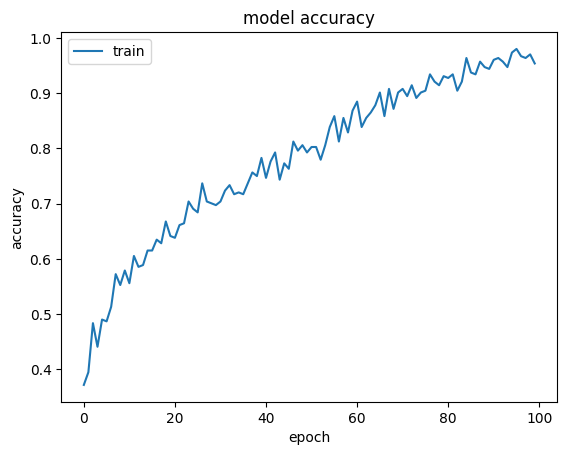

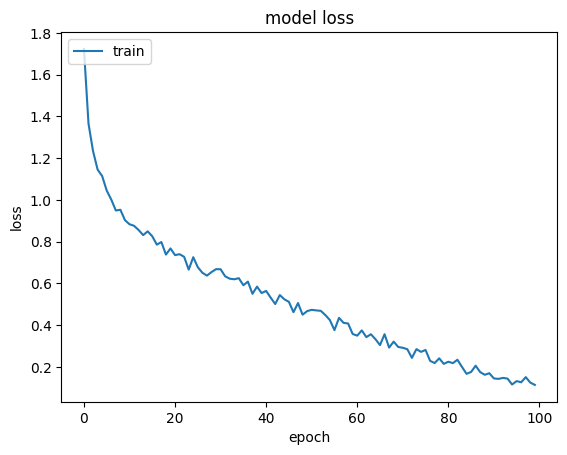

In [ ]:
#accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4451 - loss: 2.3109  
Test Score: 2.3398969173431396
Test Accuracy: 0.46052631735801697


In [ ]:
X.head()

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
0,0,0,10,10,4,4,17,18,2,4,...,0,1,0,0,0,1,0,0,0,0
1,1,2,4,19,1,8,14,17,4,6,...,1,0,0,0,0,1,0,0,0,0
2,0,3,4,9,2,5,14,13,3,4,...,1,0,0,0,0,1,0,0,0,0
3,1,0,22,12,3,2,8,13,8,3,...,0,0,1,0,0,1,0,0,0,0
4,1,1,13,3,3,2,12,9,9,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:

import tensorflow as tf

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,779 (233.51 KB)

 Trainable params: 58,883 (230.01 KB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
history = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2970 - loss: 1.6840
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5226 - loss: 1.2034 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4947 - loss: 1.1134 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5749 - loss: 0.9793 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5441 - loss: 0.9758 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5900 - loss: 0.9664 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 0.9505 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6725 - loss: 0.7944 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6660 - loss: 0.7712 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.8240 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5989 - loss: 0.9588
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - 

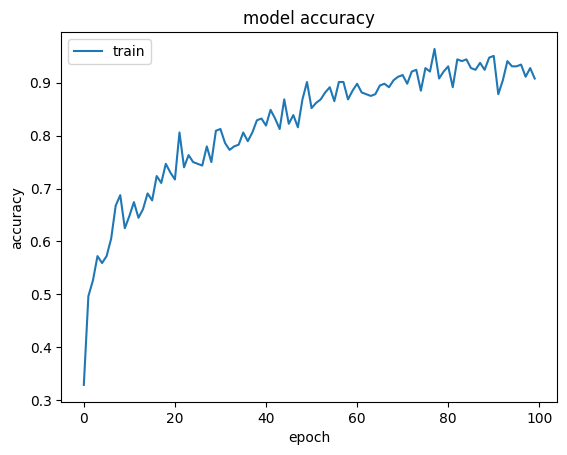

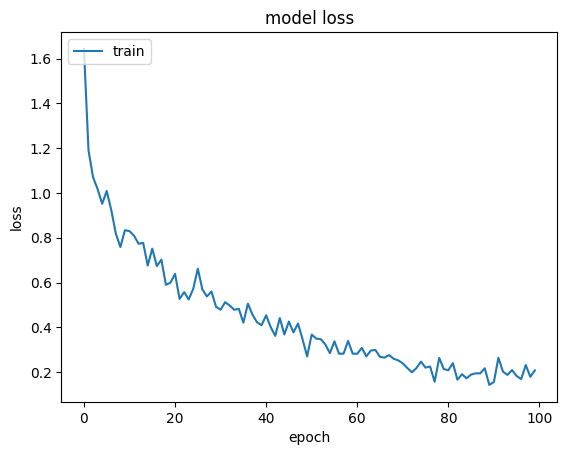

In [ ]:
#accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4451 - loss: 2.3109 
Test Score: 2.3398969173431396
Test Accuracy: 0.46052631735801697


In [ ]:
Xnew = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
#Xnew = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
Xnew = Xnew[:, :64]

print(Xnew.shape)
# make a prediction
ynew = np.argmax(model2.predict(Xnew), axis=-1)
# show the inputs and predicted outputs
print("X = %s " % Xnew)
print("Prediction = %s" % ynew[0])

(1, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
X = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 
Prediction = 2


In [ ]:
row_index = 1  # Change this to the row index you want to select
Xnew = X.iloc[row_index, :].to_numpy().reshape(1, -1)
ynew = np.argmax(model2.predict(Xnew), axis=-1)

# Show the inputs and predicted outputs
print("X = %s" % Xnew)
print("Prediction = %s" % ynew[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
X = [[ 1  2  4 19  1  8 14 17  4  6  3  3  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0]]
Prediction = 0


In [ ]:
y.head()

,FTR
0,0
1,0
2,0
3,2
4,1


In [ ]:
X.head()

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
0,0,0,10,10,4,4,17,18,2,4,...,0,1,0,0,0,1,0,0,0,0
1,1,2,4,19,1,8,14,17,4,6,...,1,0,0,0,0,1,0,0,0,0
2,0,3,4,9,2,5,14,13,3,4,...,1,0,0,0,0,1,0,0,0,0
3,1,0,22,12,3,2,8,13,8,3,...,0,0,1,0,0,1,0,0,0,0
4,1,1,13,3,3,2,12,9,9,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
row_index = 3  # Change this to the row index you want to select
Xnew = X.iloc[row_index, :].to_numpy().reshape(1, -1)
ynew = np.argmax(model2.predict(Xnew), axis=-1)

# Show the inputs and predicted outputs
print("X = %s" % Xnew)
print("Prediction = %s" % ynew[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
X = [[ 1  0 22 12  3  2  8 13  8  3  1  1  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0]]
Prediction = 2


In [ ]:
file_path = '/content/I1.csv'
df_copy = pd.read_csv(file_path)
df_copy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,19/08/2023,17:30,Empoli,Verona,0,1,A,0,0,...,1.85,-0.25,2.02,1.91,2.01,1.92,2.03,1.98,1.94,1.90
1,I1,19/08/2023,17:30,Frosinone,Napoli,1,3,A,1,2,...,2.10,1.00,1.96,1.97,1.97,1.95,2.02,1.98,1.95,1.89
2,I1,19/08/2023,19:45,Genoa,Fiorentina,1,4,A,0,3,...,1.74,0.25,1.79,2.15,1.82,2.13,2.02,2.15,1.86,2.00
3,I1,19/08/2023,19:45,Inter,Monza,2,0,H,1,0,...,2.38,-1.25,1.92,2.01,1.91,2.02,1.94,2.05,1.87,1.98
4,I1,20/08/2023,17:30,Roma,Salernitana,2,2,D,1,1,...,1.68,-1.00,1.95,1.98,1.94,1.98,2.03,2.03,1.92,1.93


In [ ]:
# Droping rows with missing target values
df_copy.dropna(subset=['FTR'], inplace=True)

# Separating numeric and non-numeric columns
numeric_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = df_copy.select_dtypes(exclude=[np.number]).columns.tolist()

# Filling missing values in numeric columns with median
df_copy[numeric_columns] = df_copy[numeric_columns].fillna(df_copy[numeric_columns].median())

# Filling missing values in non-numeric columns with mode
for col in df_copy.columns:df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)


# Checking if there are any missing values left
print(df_copy.isnull().sum())

print(df_copy.head())

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 105, dtype: int64
  Div        Date   Time   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  I1  19/08/2023  17:30     Empoli       Verona     0     1   A     0     0   
1  I1  19/08/2023  17:30  Frosinone       Napoli     1     3   A     1     2   
2  I1  19/08/2023  19:45      Genoa   Fiorentina     1     4   A     0     3   
3  I1  19/08/2023  19:45      Inter        Monza     2     0   H     1     0   
4  I1  20/08/2023  17:30       Roma  Salernitana     2     2   D     1     1   

   ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  \
0  ...     1.85 -0.25      2.02      1.91   2.01   1.92     2.03     1.98   
1  ...     2.10  1.00      1.96      1.97   1.97   1.95     2.02     1.98   
2  ...     1.74  0.25      1.79      2.15   1.82   2.13     2.02     2.15   
3  ...     2.38 -1.25      1.92

In [ ]:
keywords_drop = ['B365', 'BW', 'IW', 'PS', 'WH', 'VC', 'Max', 'Avg', 'P>2.5', 'P<2.5', 'AHh', 'AHH', 'AHA', 'CH', 'CD', 'CA', 'C>2.5', 'C<2.5','AHCh','FTAG','FTHG']

# Creating a list of columns to drop
columns_to_drop = [col for col in df_copy.columns if any(keyword in col for keyword in keywords_drop)]
df_copy = df_copy.drop(columns=columns_to_drop)
df_copy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,19/08/2023,17:30,Empoli,Verona,A,0,0,D,10,...,4,4,17,18,2,4,2,2,0,0
1,I1,19/08/2023,17:30,Frosinone,Napoli,A,1,2,A,4,...,1,8,14,17,4,6,3,3,0,0
2,I1,19/08/2023,19:45,Genoa,Fiorentina,A,0,3,A,4,...,2,5,14,13,3,4,2,3,0,0
3,I1,19/08/2023,19:45,Inter,Monza,H,1,0,H,22,...,3,2,8,13,8,3,1,1,0,0
4,I1,20/08/2023,17:30,Roma,Salernitana,D,1,1,D,13,...,3,2,12,9,9,1,0,4,0,0


In [ ]:
df_copy = pd.get_dummies(df_copy, columns=['HomeTeam'], prefix = ['HomeTeam'],dtype=int)
df_copy = pd.get_dummies(df_copy, columns=['AwayTeam'], prefix = ['AwayTeam'],dtype=int)
df_copy = pd.get_dummies(df_copy, columns=['HTR'], prefix = ['HTR'],dtype=int)
df_copy.head()

,Div,Date,Time,FTR,HTHG,HTAG,HS,AS,HST,AST,...,AwayTeam_Napoli,AwayTeam_Roma,AwayTeam_Salernitana,AwayTeam_Sassuolo,AwayTeam_Torino,AwayTeam_Udinese,AwayTeam_Verona,HTR_A,HTR_D,HTR_H
0,I1,19/08/2023,17:30,A,0,0,10,10,4,4,...,0,0,0,0,0,0,1,0,1,0
1,I1,19/08/2023,17:30,A,1,2,4,19,1,8,...,1,0,0,0,0,0,0,1,0,0
2,I1,19/08/2023,19:45,A,0,3,4,9,2,5,...,0,0,0,0,0,0,0,1,0,0
3,I1,19/08/2023,19:45,H,1,0,22,12,3,2,...,0,0,0,0,0,0,0,0,0,1
4,I1,20/08/2023,17:30,D,1,1,13,3,3,2,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
label_encoder = LabelEncoder()
df_copy['FTR']= label_encoder.fit_transform(df_copy['FTR'])

In [ ]:
X = df_copy.drop(['FTR','Div','Time','Date'],axis=1)
y = df_copy['FTR']

In [ ]:
import tensorflow as tf
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)
# One-hot-encoding y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print("The size of y_train is " + str(y_train.shape))
print("The size of y_test is " + str(y_test.shape))
print(y_train[0])

The size of y_train is (304, 3)
The size of y_test is (76, 3)
[1. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(57,)),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           7,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,875 (62.01 KB)

 Trainable params: 15,875 (62.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3232 - loss: 1.8470
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3800 - loss: 1.4708  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4107 - loss: 1.2272 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4793 - loss: 1.1193 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5525 - loss: 1.0012 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4919 - loss: 1.0712  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4593 - loss: 1.0064 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 0.8957 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5767 - loss: 0.9017 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5766 - loss: 0.8837  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5633 - loss: 0.9330  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

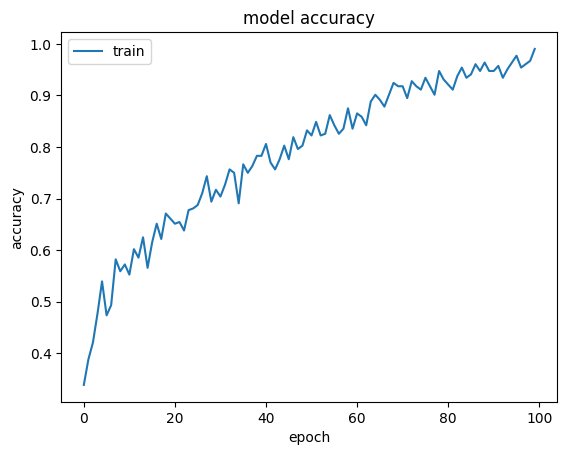

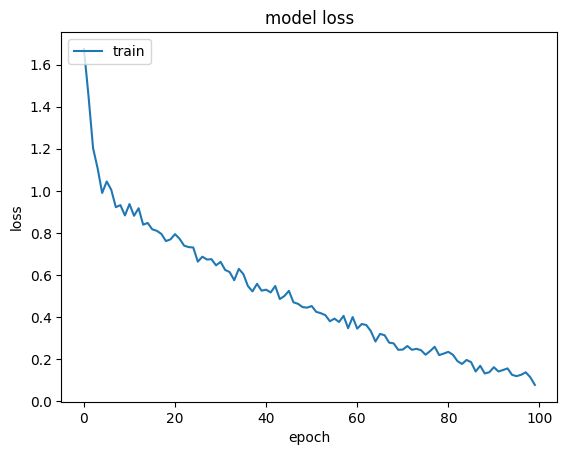

In [ ]:
#accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4542 - loss: 2.5302  
Test Score: 2.5338637828826904
Test Accuracy: 0.44736841320991516


In [ ]:
Xnew = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
#Xnew = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
Xnew = Xnew[:, :57]

print(Xnew.shape)
# make a prediction
ynew = np.argmax(model.predict(Xnew), axis=-1)
# show the inputs and predicted outputs
print("X = %s " % Xnew)
print("Prediction = %s" % ynew[0])

(1, 57)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
X = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 
Prediction = 2


In [ ]:

import tensorflow as tf

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(57,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │          14,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,987 (226.51 KB)

 Trainable params: 57,091 (223.01 KB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
history = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4005 - loss: 1.7686
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4391 - loss: 1.3974  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4618 - loss: 1.1883  
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5459 - loss: 1.0449  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.9934 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - loss: 1.0706 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6093 - loss: 0.9504  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5961 - loss: 0.9240 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6164 - loss: 0.8839
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6619 - loss: 0.8357
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5917 - loss: 0.8981 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

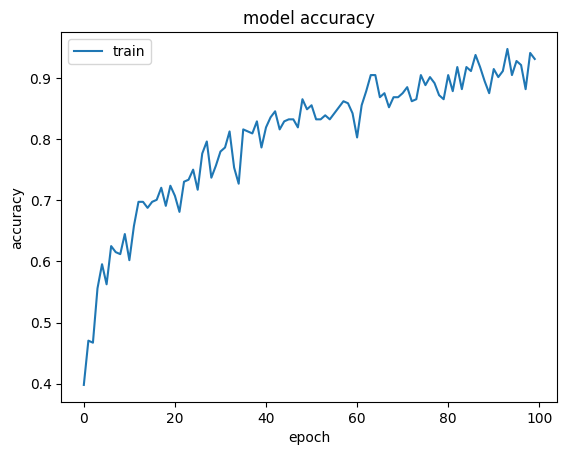

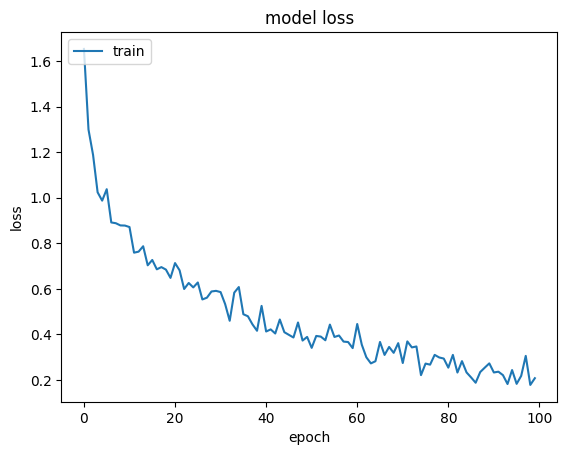

In [ ]:
#accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4542 - loss: 2.5302 
Test Score: 2.5338637828826904
Test Accuracy: 0.44736841320991516


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(X_test)

y_pred_class = tf.argmax(y_pred, axis=1)

y_test_class = tf.argmax(y_test, axis=1)

report = classification_report(y_test_class, y_pred_class)

print("Classification Report:")
print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.73      0.64        22
           1       0.33      0.21      0.26        29
           2       0.50      0.60      0.55        25

    accuracy                           0.49        76
   macro avg       0.47      0.51      0.48        76
weighted avg       0.46      0.49      0.46        76



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=200)
grad_boost = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,         # Use less data per tree
    max_features='sqrt',   # Limit the number of features to consider at each split
    random_state=42
)
# Valid parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(200, 500),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                                      n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV for Random Forest
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_

# Predict with the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the tuned Random Forest model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Print a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Tuned Random Forest Accuracy: 0.4342105263157895
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.55      0.67        22
           1       0.50      0.17      0.26        29
           2       0.55      0.64      0.59        25

   micro avg       0.62      0.43      0.51        76
   macro avg       0.64      0.45      0.51        76
weighted avg       0.62      0.43      0.49        76
 samples avg       0.43      0.43      0.43        76

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: multilabel-indicator is not supported